In [ ]:
import pandas as pd
import re
import numpy as np

In [ ]:
df = pd.read_csv('/content/email_spam.csv')

In [ ]:
df

,title,text,type
0,?? the secrets to SUCCESS,"Hi James,\n\nHave you claim your complimentary...",spam
1,?? You Earned 500 GCLoot Points,"\nalt_text\nCongratulations, you just earned\n...",not spam
2,?? Your GitHub launch code,"Here's your GitHub launch code, @Mortyj420!\n ...",not spam
3,[The Virtual Reward Center] Re: ** Clarifications,"Hello,\n \nThank you for contacting the Virtua...",not spam
4,"10-1 MLB Expert Inside, Plus Everything You Ne...","Hey Prachanda Rawal,\n\nToday's newsletter is ...",spam
...,...,...,...
79,Your application for the position of Child Pr...,"Dear Maryam, \n\n \n\nI would like to thank yo...",not spam
80,Your Kilimall Account is Ready - Shopping Now!,"Dear Customer,\n\nWelcome to Kilimall, Thanks ...",not spam
81,Your Steam account: Access from new web or mob...,"Dear vladis163rus,\nHere is the Steam Guard co...",not spam
82,Your uploaded document is rejected,View In Browser | Log in\n \n \n\nSkrill logo\...,not spam


In [ ]:
df.head()
df.isnull().sum()
(y_train.isnull().sum())

np.int64(0)

In [ ]:
df = df[['text', 'type']].copy()
df.columns = ['text', 'label']

In [ ]:
df['label'] = df['label'].map({'not spam':0, 'spam':1})

In [ ]:
def clean_text(text):
    text = text.lower()
    text = re.sub(r'\W', ' ', text)
    text = re.sub(r'\d', '', text)
    text = re.sub(r'\s+', ' ', text)
    return text

df['clean_text'] = df['text'].apply(clean_text)


In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
X = df['clean_text']
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(max_features=3000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

In [ ]:
from sklearn.naive_bayes import MultinomialNB

In [ ]:
non_nan_mask = y_train.notna()
X_train_filtered = X_train_tfidf[non_nan_mask.values]
y_train_filtered = y_train[non_nan_mask]

nb_model = MultinomialNB()
nb_model.fit(X_train_filtered, y_train_filtered)
y_pred_nb = nb_model.predict(X_test_tfidf)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train_tfidf, y_train)
y_pred_rf = rf_model.predict(X_test_tfidf)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

Naive Bayes Performance
Accuracy: 0.6470588235294118
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


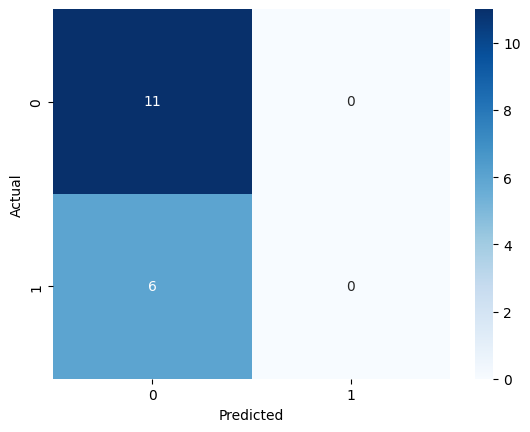

RandomForestClassifier
Accuracy: 0.7058823529411765
Precision: 1.0
Recall: 0.16666666666666666
F1 Score: 0.2857142857142857


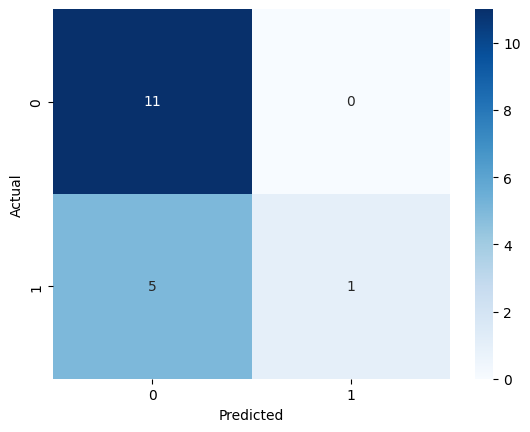

In [ ]:
def evaluate(y_true, y_pred):
    print("Accuracy:", accuracy_score(y_true, y_pred))
    print("Precision:", precision_score(y_true, y_pred))
    print("Recall:", recall_score(y_true, y_pred))
    print("F1 Score:", f1_score(y_true, y_pred))
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

print("Naive Bayes Performance")
evaluate(y_test, y_pred_nb)

print("RandomForestClassifier")
evaluate(y_test, y_pred_rf)